# Scraping Data Twitter with snscrape

In [ ]:
import pandas as pd

!pip install snscrape
import snscrape.modules.twitter as sntwitter
import itertools

import numpy as np
import csv

In [ ]:
#scraping data with keyword vaksin
df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
   'vaksin').get_items(), 500))[['username', 'date', 'content']]



In [ ]:
df.head()

,username,date,content
0,Nephelliuma,2021-06-28 14:31:18+00:00,"Ribet di bekasi mah, apalagi anak tiri (kabupa..."
1,wvwnvdwvw,2021-06-28 14:31:16+00:00,Wolverine pun ambik vaksin dan takut covid! Ap...
2,ibungaa_,2021-06-28 14:31:13+00:00,"terimakasih Unimas, sudi mengongsi video vaksi..."
3,anakuningan,2021-06-28 14:31:10+00:00,mangat buat sobat2ku yg skrg lg mau izin cuti ...
4,Ndukla2,2021-06-28 14:31:09+00:00,BPOM telah mengeluarkan izin penggunaan darura...


In [ ]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,username,date,content
count,500,500,500
unique,452,435,500
top,IDNTimesJabar,2021-06-28 14:26:38+00:00,@byunbackcon Nanti kalo dia mgomong gitu lagi....
freq,6,3,1
first,NaN,2021-06-28 14:06:11+00:00,NaN
last,NaN,2021-06-28 14:31:18+00:00,NaN


In [ ]:
df.isna().any()

username    False
date        False
content     False
dtype: bool

In [ ]:
df.isnull().sum()

username    0
date        0
content     0
dtype: int64

In [ ]:
df = df.drop(columns=['username', 'date'])

In [ ]:
df

,content
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa..."
1,Wolverine pun ambik vaksin dan takut covid! Ap...
2,"terimakasih Unimas, sudi mengongsi video vaksi..."
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...
4,BPOM telah mengeluarkan izin penggunaan darura...
...,...
495,@rightchopstick1 Daripada buat bank bergerak b...
496,Pemerintah Presiden @jokowi akan segera melaku...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...
498,"Karena warga sendiri udah pd pusing, pusing dg..."


In [ ]:
df.content=df.content.astype(str)

In [ ]:
df

,content
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa..."
1,Wolverine pun ambik vaksin dan takut covid! Ap...
2,"terimakasih Unimas, sudi mengongsi video vaksi..."
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...
4,BPOM telah mengeluarkan izin penggunaan darura...
...,...
495,@rightchopstick1 Daripada buat bank bergerak b...
496,Pemerintah Presiden @jokowi akan segera melaku...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...
498,"Karena warga sendiri udah pd pusing, pusing dg..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/mini-bootcamp/dataset_vaksin.csv', index=None)

# Cleaning Data with NLTK

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mini-bootcamp/dataset_vaksin.csv')
df

,content
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa..."
1,Wolverine pun ambik vaksin dan takut covid! Ap...
2,"terimakasih Unimas, sudi mengongsi video vaksi..."
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...
4,BPOM telah mengeluarkan izin penggunaan darura...
...,...
495,@rightchopstick1 Daripada buat bank bergerak b...
496,Pemerintah Presiden @jokowi akan segera melaku...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...
498,"Karena warga sendiri udah pd pusing, pusing dg..."


In [ ]:
#  Cleaning text
import re
import string

def clean_text(tweet):
    tweet = tweet.lower() # text lowercase
    tweet = re.sub('@[^\s]+', '', tweet) # remove usernames
    tweet = re.sub('\[.*?\]', '', tweet) # remove square brackets
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweet) # remove URLs
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet) # remove punctuation
    tweet = re.sub('\w*\d\w*', '', tweet) 
    tweet = re.sub('[‘’“”…]', '', tweet)
    tweet = re.sub('\n', '', tweet)
    return tweet

    
tweet = lambda x: clean_text(x)

In [ ]:
df['clean1'] = pd.DataFrame(df.content.apply(tweet))
df

,content,clean1
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...
...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,daripada buat bank bergerak buat lah vaksin b...
496,Pemerintah Presiden @jokowi akan segera melaku...,pemerintah presiden akan segera melakukan vak...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,apa fungsi dapat vaksin tapi parlimen pun tak...
498,"Karena warga sendiri udah pd pusing, pusing dg...",karena warga sendiri udah pd pusing pusing dgn...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('indonesian'), additional)

df['clean2'] = (df['clean1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (swords)])))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,clean1,clean2
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...,ribet bekasi mah anak tiri kabupaten mending j...
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...,wolverine ambik vaksin takut covid alasan meno...
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi mengongsi video vaksin...
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...,mangat yg skrg lg izin cuti perkara vaksin cam...
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...,bpom mengeluarkan izin penggunaan darurat emer...
...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,daripada buat bank bergerak buat lah vaksin b...,bank bergerak vaksin bergerak pusat internet b...
496,Pemerintah Presiden @jokowi akan segera melaku...,pemerintah presiden akan segera melakukan vak...,pemerintah presiden vaksinasi anakanak berusia...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,apa fungsi dapat vaksin tapi parlimen pun tak...,fungsi vaksin parlimen takut nak buka kiwak haha
498,"Karena warga sendiri udah pd pusing, pusing dg...",karena warga sendiri udah pd pusing pusing dgn...,warga udah pd pusing pusing dgn percaya kopid ...


In [ ]:
text = df['clean2']

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 4.3MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

list_hasil = text

output = [(stemmer.stem(token)) for token in list_hasil]

In [ ]:
df['clean3'] = output

In [ ]:
df

In [ ]:
df.dropna()

,content,clean1,clean2,clean3
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...,ribet bekasi mah anak tiri kabupaten mending j...,ribet bekas mah anak tiri kabupaten mending jk...
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...,wolverine ambik vaksin takut covid alasan meno...,wolverine ambik vaksin takut covid alas tolak ...
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi kongsi video vaksin pr...
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...,mangat yg skrg lg izin cuti perkara vaksin cam...,mangat yg skrg lg izin cuti perkara vaksin cam...
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...,bpom mengeluarkan izin penggunaan darurat emer...,bpom keluar izin guna darurat emergency use of...
...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,daripada buat bank bergerak buat lah vaksin b...,bank bergerak vaksin bergerak pusat internet b...,bank gerak vaksin gerak pusat internet gerak f...
496,Pemerintah Presiden @jokowi akan segera melaku...,pemerintah presiden akan segera melakukan vak...,pemerintah presiden vaksinasi anakanak berusia...,perintah presiden vaksinasi anakanak usia irin...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,apa fungsi dapat vaksin tapi parlimen pun tak...,fungsi vaksin parlimen takut nak buka kiwak haha,fungsi vaksin parlimen takut nak buka kiwak haha
498,"Karena warga sendiri udah pd pusing, pusing dg...",karena warga sendiri udah pd pusing pusing dgn...,warga udah pd pusing pusing dgn percaya kopid ...,warga udah pd pusing pusing dgn percaya kopid ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['tokens'] = pd.DataFrame(df['clean3'].apply(nltk.word_tokenize))
df

,content,clean1,clean2,clean3,tokens
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...,ribet bekasi mah anak tiri kabupaten mending j...,ribet bekas mah anak tiri kabupaten mending jk...,"[ribet, bekas, mah, anak, tiri, kabupaten, men..."
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...,wolverine ambik vaksin takut covid alasan meno...,wolverine ambik vaksin takut covid alas tolak ...,"[wolverine, ambik, vaksin, takut, covid, alas,..."
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi kongsi video vaksin pr...,"[terimakasih, unimas, sudi, kongsi, video, vak..."
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...,mangat yg skrg lg izin cuti perkara vaksin cam...,mangat yg skrg lg izin cuti perkara vaksin cam...,"[mangat, yg, skrg, lg, izin, cuti, perkara, va..."
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...,bpom mengeluarkan izin penggunaan darurat emer...,bpom keluar izin guna darurat emergency use of...,"[bpom, keluar, izin, guna, darurat, emergency,..."
...,...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,daripada buat bank bergerak buat lah vaksin b...,bank bergerak vaksin bergerak pusat internet b...,bank gerak vaksin gerak pusat internet gerak f...,"[bank, gerak, vaksin, gerak, pusat, internet, ..."
496,Pemerintah Presiden @jokowi akan segera melaku...,pemerintah presiden akan segera melakukan vak...,pemerintah presiden vaksinasi anakanak berusia...,perintah presiden vaksinasi anakanak usia irin...,"[perintah, presiden, vaksinasi, anakanak, usia..."
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,apa fungsi dapat vaksin tapi parlimen pun tak...,fungsi vaksin parlimen takut nak buka kiwak haha,fungsi vaksin parlimen takut nak buka kiwak haha,"[fungsi, vaksin, parlimen, takut, nak, buka, k..."
498,"Karena warga sendiri udah pd pusing, pusing dg...",karena warga sendiri udah pd pusing pusing dgn...,warga udah pd pusing pusing dgn percaya kopid ...,warga udah pd pusing pusing dgn percaya kopid ...,"[warga, udah, pd, pusing, pusing, dgn, percaya..."


In [ ]:
#terjemahkan data ke english

In [ ]:
!pip install google_trans_new

In [ ]:
from google_trans_new import google_translator  

translator = google_translator()  

In [ ]:
def translate_column(text, target_language):
    return translator.translate(text, lang_tgt=target_language)

In [ ]:
df['clean_english'] = df['clean3'].apply(lambda x: translate_column(x, 'en'))

In [ ]:
df

,content,clean1,clean2,clean3,tokens,clean_english
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...,ribet bekasi mah anak tiri kabupaten mending j...,ribet bekas mah anak tiri kabupaten mending jk...,"[ribet, bekas, mah, anak, tiri, kabupaten, men...",Former Ribet Mah Stepchildren Mending Jkt Inte...
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...,wolverine ambik vaksin takut covid alasan meno...,wolverine ambik vaksin takut covid alas tolak ...,"[wolverine, ambik, vaksin, takut, covid, alas,...",Wolverine ambining vaccine Fear Covid Alas Rus...
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi kongsi video vaksin pr...,"[terimakasih, unimas, sudi, kongsi, video, vak...",Terimakihan Unimas Saudi Saudi Video Proper La...
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...,mangat yg skrg lg izin cuti perkara vaksin cam...,mangat yg skrg lg izin cuti perkara vaksin cam...,"[mangat, yg, skrg, lg, izin, cuti, perkara, va...",Mangat YG SKRG LG Izin Holidays Campaign Campa...
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...,bpom mengeluarkan izin penggunaan darurat emer...,bpom keluar izin guna darurat emergency use of...,"[bpom, keluar, izin, guna, darurat, emergency,...",BPOM Exit Permit for Emergency Emergency Use o...
...,...,...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,daripada buat bank bergerak buat lah vaksin b...,bank bergerak vaksin bergerak pusat internet b...,bank gerak vaksin gerak pusat internet gerak f...,"[bank, gerak, vaksin, gerak, pusat, internet, ...",Bank Vaccine Vaccine Gesture Internet Food Foo...
496,Pemerintah Presiden @jokowi akan segera melaku...,pemerintah presiden akan segera melakukan vak...,pemerintah presiden vaksinasi anakanak berusia...,perintah presiden vaksinasi anakanak usia irin...,"[perintah, presiden, vaksinasi, anakanak, usia...",President's President's Order Commandment Deli...
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,apa fungsi dapat vaksin tapi parlimen pun tak...,fungsi vaksin parlimen takut nak buka kiwak haha,fungsi vaksin parlimen takut nak buka kiwak haha,"[fungsi, vaksin, parlimen, takut, nak, buka, k...",The Function of the Parliament Vaccine is afra...
498,"Karena warga sendiri udah pd pusing, pusing dg...",karena warga sendiri udah pd pusing pusing dgn...,warga udah pd pusing pusing dgn percaya kopid ...,warga udah pd pusing pusing dgn percaya kopid ...,"[warga, udah, pd, pusing, pusing, dgn, percaya...",residents already dizzy and believe covid or v...


In [ ]:
df.to_csv('/content/drive/MyDrive/mini-bootcamp/dataset_vaksin_clean.csv', index=None)

# Modelling with unsupervised learning & Visualization

In [ ]:
#label manual terlebih dahulu untuk sentimen sebenarnya

In [ ]:
import csv
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mini-bootcamp/dataset_vaksin_clean_english.csv')
df.head()

,content,clean1,clean2,clean3,tokens,clean_english,Label
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...,ribet bekasi mah anak tiri kabupaten mending j...,ribet bekas mah anak tiri kabupaten mending jk...,"['ribet', 'bekas', 'mah', 'anak', 'tiri', 'kab...",Former Ribet Mah Stepchildren Mending Jkt Inte...,positive
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...,wolverine ambik vaksin takut covid alasan meno...,wolverine ambik vaksin takut covid alas tolak ...,"['wolverine', 'ambik', 'vaksin', 'takut', 'cov...",Wolverine ambining vaccine Fear Covid Alas Rus...,positive
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi kongsi video vaksin pr...,"['terimakasih', 'unimas', 'sudi', 'kongsi', 'v...",Terimakihan Unimas Saudi Saudi Video Proper La...,positive
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...,mangat yg skrg lg izin cuti perkara vaksin cam...,mangat yg skrg lg izin cuti perkara vaksin cam...,"['mangat', 'yg', 'skrg', 'lg', 'izin', 'cuti',...",Mangat YG SKRG LG Izin Holidays Campaign Campa...,positive
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...,bpom mengeluarkan izin penggunaan darurat emer...,bpom keluar izin guna darurat emergency use of...,"['bpom', 'keluar', 'izin', 'guna', 'darurat', ...",BPOM Exit Permit for Emergency Emergency Use o...,positive


In [ ]:
df['Label'].value_counts()

positive    277
negative    223
Name: Label, dtype: int64

## Modelling with textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df['clean_english'] = df['clean_english'].astype('str')
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity'] = df['clean_english'].apply(get_polarity)

In [ ]:
df

,content,clean1,clean2,clean3,tokens,clean_english,Label,polarity
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",ribet di bekasi mah apalagi anak tiri kabupate...,ribet bekasi mah anak tiri kabupaten mending j...,ribet bekas mah anak tiri kabupaten mending jk...,"['ribet', 'bekas', 'mah', 'anak', 'tiri', 'kab...",Former Ribet Mah Stepchildren Mending Jkt Inte...,positive,-0.250000
1,Wolverine pun ambik vaksin dan takut covid! Ap...,wolverine pun ambik vaksin dan takut covid apa...,wolverine ambik vaksin takut covid alasan meno...,wolverine ambik vaksin takut covid alas tolak ...,"['wolverine', 'ambik', 'vaksin', 'takut', 'cov...",Wolverine ambining vaccine Fear Covid Alas Rus...,positive,-0.400000
2,"terimakasih Unimas, sudi mengongsi video vaksi...",terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi mengongsi video vaksin...,terimakasih unimas sudi kongsi video vaksin pr...,"['terimakasih', 'unimas', 'sudi', 'kongsi', 'v...",Terimakihan Unimas Saudi Saudi Video Proper La...,positive,0.000000
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,mangat buat yg skrg lg mau izin cuti perkara ...,mangat yg skrg lg izin cuti perkara vaksin cam...,mangat yg skrg lg izin cuti perkara vaksin cam...,"['mangat', 'yg', 'skrg', 'lg', 'izin', 'cuti',...",Mangat YG SKRG LG Izin Holidays Campaign Campa...,positive,-0.100000
4,BPOM telah mengeluarkan izin penggunaan darura...,bpom telah mengeluarkan izin penggunaan darura...,bpom mengeluarkan izin penggunaan darurat emer...,bpom keluar izin guna darurat emergency use of...,"['bpom', 'keluar', 'izin', 'guna', 'darurat', ...",BPOM Exit Permit for Emergency Emergency Use o...,positive,0.750000
...,...,...,...,...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,daripada buat bank bergerak buat lah vaksin be...,bank bergerak vaksin bergerak pusat internet b...,bank gerak vaksin gerak pusat internet gerak f...,"['bank', 'gerak', 'vaksin', 'gerak', 'pusat', ...",Bank Vaccine Vaccine Gesture Internet Food Foo...,positive,-0.800000
496,Pemerintah Presiden @jokowi akan segera melaku...,pemerintah presiden akan segera melakukan vak...,pemerintah presiden vaksinasi anakanak berusia...,perintah presiden vaksinasi anakanak usia irin...,"['perintah', 'presiden', 'vaksinasi', 'anakana...",President's President's Order Commandment Deli...,positive,0.000000
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,apa fungsi dapat vaksin tapi parlimen pun tak...,fungsi vaksin parlimen takut nak buka kiwak haha,fungsi vaksin parlimen takut nak buka kiwak haha,"['fungsi', 'vaksin', 'parlimen', 'takut', 'nak...",The Function of the Parliament Vaccine is afra...,positive,-0.133333
498,"Karena warga sendiri udah pd pusing, pusing dg...",karena warga sendiri udah pd pusing pusing dgn...,warga udah pd pusing pusing dgn percaya kopid ...,warga udah pd pusing pusing dgn percaya kopid ...,"['warga', 'udah', 'pd', 'pusing', 'pusing', 'd...",residents already dizzy and believe covid or v...,negative,0.000000


In [ ]:
df = df.drop(columns=['clean1', 'clean2', 'clean3','tokens'])

df

,content,clean_english,Label,polarity
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",Former Ribet Mah Stepchildren Mending Jkt Inte...,positive,-0.250000
1,Wolverine pun ambik vaksin dan takut covid! Ap...,Wolverine ambining vaccine Fear Covid Alas Rus...,positive,-0.400000
2,"terimakasih Unimas, sudi mengongsi video vaksi...",Terimakihan Unimas Saudi Saudi Video Proper La...,positive,0.000000
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,Mangat YG SKRG LG Izin Holidays Campaign Campa...,positive,-0.100000
4,BPOM telah mengeluarkan izin penggunaan darura...,BPOM Exit Permit for Emergency Emergency Use o...,positive,0.750000
...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,Bank Vaccine Vaccine Gesture Internet Food Foo...,positive,-0.800000
496,Pemerintah Presiden @jokowi akan segera melaku...,President's President's Order Commandment Deli...,positive,0.000000
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,The Function of the Parliament Vaccine is afra...,positive,-0.133333
498,"Karena warga sendiri udah pd pusing, pusing dg...",residents already dizzy and believe covid or v...,negative,0.000000


In [ ]:
df['sentimen_textblob']=''
df.loc[df.polarity>=0,'sentimen_textblob']='positive'
#df.loc[df.polarity==0,'sentimen_textblob']='neutral'
df.loc[df.polarity<0,'sentimen_textblob']='negative'

In [ ]:
df

,content,clean_english,Label,polarity,sentimen_textblob,scores,compound,sentimen_vader
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",Former Ribet Mah Stepchildren Mending Jkt Inte...,positive,-0.250000,negative,"{'neg': 0.161, 'neu': 0.645, 'pos': 0.194, 'co...",0.1280,positive
1,Wolverine pun ambik vaksin dan takut covid! Ap...,Wolverine ambining vaccine Fear Covid Alas Rus...,positive,-0.400000,negative,"{'neg': 0.469, 'neu': 0.531, 'pos': 0.0, 'comp...",-0.6486,negative
2,"terimakasih Unimas, sudi mengongsi video vaksi...",Terimakihan Unimas Saudi Saudi Video Proper La...,positive,0.000000,positive,"{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp...",-0.4215,negative
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,Mangat YG SKRG LG Izin Holidays Campaign Campa...,positive,-0.100000,negative,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.3818,positive
4,BPOM telah mengeluarkan izin penggunaan darura...,BPOM Exit Permit for Emergency Emergency Use o...,positive,0.750000,positive,"{'neg': 0.199, 'neu': 0.69, 'pos': 0.111, 'com...",-0.3182,negative
...,...,...,...,...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,Bank Vaccine Vaccine Gesture Internet Food Foo...,positive,-0.800000,negative,"{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'comp...",-0.5267,negative
496,Pemerintah Presiden @jokowi akan segera melaku...,President's President's Order Commandment Deli...,positive,0.000000,positive,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",-0.3818,negative
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,The Function of the Parliament Vaccine is afra...,positive,-0.133333,negative,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.4588,positive
498,"Karena warga sendiri udah pd pusing, pusing dg...",residents already dizzy and believe covid or v...,negative,0.000000,positive,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.2263,negative


In [ ]:
df['sentimen_textblob'].value_counts()

positive    414
negative     86
Name: sentimen_textblob, dtype: int64

In [ ]:
df['Label'].value_counts()

positive    277
negative    223
Name: Label, dtype: int64

In [ ]:
positive=df[df['sentimen_textblob']=="positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"%")
pos=positive.shape[0]/df.shape[0]*100

82.8%


In [ ]:
negative=df[df['sentimen_textblob']=="negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"%")
neg=negative.shape[0]/df.shape[0]*100

17.2%


In [ ]:
neutral=df[df['sentimen_textblob']=="neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"%")
net=neutral.shape[0]/df.shape[0]*100

48.4%


In [ ]:
import matplotlib.pyplot as plt

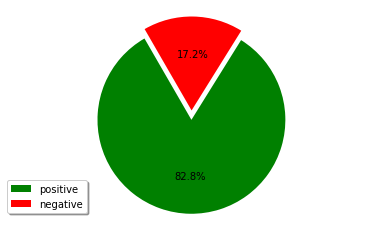

In [ ]:
explode=(0,0.1)
labels = 'positive', 'negative'
sizes=(pos,neg)
colors=('green','red')

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis TextBlob.png")

## Modelling with Vader

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['scores'] = df['clean_english'].apply(lambda new_text: sid.polarity_scores(new_text))
df

,content,clean_english,Label,polarity,sentimen_textblob,scores,compound,sentimen_vader
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",Former Ribet Mah Stepchildren Mending Jkt Inte...,positive,-0.250000,negative,"{'neg': 0.161, 'neu': 0.645, 'pos': 0.194, 'co...",0.1280,positive
1,Wolverine pun ambik vaksin dan takut covid! Ap...,Wolverine ambining vaccine Fear Covid Alas Rus...,positive,-0.400000,negative,"{'neg': 0.469, 'neu': 0.531, 'pos': 0.0, 'comp...",-0.6486,negative
2,"terimakasih Unimas, sudi mengongsi video vaksi...",Terimakihan Unimas Saudi Saudi Video Proper La...,positive,0.000000,neutral,"{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp...",-0.4215,negative
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,Mangat YG SKRG LG Izin Holidays Campaign Campa...,positive,-0.100000,negative,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.3818,positive
4,BPOM telah mengeluarkan izin penggunaan darura...,BPOM Exit Permit for Emergency Emergency Use o...,positive,0.750000,positive,"{'neg': 0.199, 'neu': 0.69, 'pos': 0.111, 'com...",-0.3182,negative
...,...,...,...,...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,Bank Vaccine Vaccine Gesture Internet Food Foo...,positive,-0.800000,negative,"{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'comp...",-0.5267,negative
496,Pemerintah Presiden @jokowi akan segera melaku...,President's President's Order Commandment Deli...,positive,0.000000,neutral,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",-0.3818,negative
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,The Function of the Parliament Vaccine is afra...,positive,-0.133333,negative,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.4588,positive
498,"Karena warga sendiri udah pd pusing, pusing dg...",residents already dizzy and believe covid or v...,negative,0.000000,neutral,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.2263,negative


In [ ]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentimen_vader']=''
df.loc[df.compound>=0,'sentimen_vader']='positive'
#df.loc[df.compound==0,'sentimen_vader']='neutral'
df.loc[df.compound<0,'sentimen_vader']='negative'

In [ ]:
df

,content,clean_english,Label,polarity,sentimen_textblob,scores,compound,sentimen_vader
0,"Ribet di bekasi mah, apalagi anak tiri (kabupa...",Former Ribet Mah Stepchildren Mending Jkt Inte...,positive,-0.250000,negative,"{'neg': 0.161, 'neu': 0.645, 'pos': 0.194, 'co...",0.1280,positive
1,Wolverine pun ambik vaksin dan takut covid! Ap...,Wolverine ambining vaccine Fear Covid Alas Rus...,positive,-0.400000,negative,"{'neg': 0.469, 'neu': 0.531, 'pos': 0.0, 'comp...",-0.6486,negative
2,"terimakasih Unimas, sudi mengongsi video vaksi...",Terimakihan Unimas Saudi Saudi Video Proper La...,positive,0.000000,positive,"{'neg': 0.237, 'neu': 0.763, 'pos': 0.0, 'comp...",-0.4215,negative
3,mangat buat sobat2ku yg skrg lg mau izin cuti ...,Mangat YG SKRG LG Izin Holidays Campaign Campa...,positive,-0.100000,negative,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.3818,positive
4,BPOM telah mengeluarkan izin penggunaan darura...,BPOM Exit Permit for Emergency Emergency Use o...,positive,0.750000,positive,"{'neg': 0.199, 'neu': 0.69, 'pos': 0.111, 'com...",-0.3182,negative
...,...,...,...,...,...,...,...,...
495,@rightchopstick1 Daripada buat bank bergerak b...,Bank Vaccine Vaccine Gesture Internet Food Foo...,positive,-0.800000,negative,"{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'comp...",-0.5267,negative
496,Pemerintah Presiden @jokowi akan segera melaku...,President's President's Order Commandment Deli...,positive,0.000000,positive,"{'neg': 0.157, 'neu': 0.843, 'pos': 0.0, 'comp...",-0.3818,negative
497,apa fungsi dapat vaksin awal2 tapi parlimen pu...,The Function of the Parliament Vaccine is afra...,positive,-0.133333,negative,"{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0.4588,positive
498,"Karena warga sendiri udah pd pusing, pusing dg...",residents already dizzy and believe covid or v...,negative,0.000000,positive,"{'neg': 0.112, 'neu': 0.888, 'pos': 0.0, 'comp...",-0.2263,negative


In [ ]:
df['sentimen_vader'].value_counts()

positive    388
negative    112
Name: sentimen_vader, dtype: int64

In [ ]:
df['sentimen_textblob'].value_counts()

positive    414
negative     86
Name: sentimen_textblob, dtype: int64

In [ ]:
df['Label'].value_counts()

positive    277
negative    223
Name: Label, dtype: int64

In [ ]:
positive=df[df['sentimen_vader']=="positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"%")
pos=positive.shape[0]/df.shape[0]*100

77.60000000000001%


In [ ]:
negative=df[df['sentimen_vader']=="negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"%")
neg=negative.shape[0]/df.shape[0]*100

22.400000000000002%


In [ ]:
neutral=df[df['sentimen_vader']=="neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"%")
net=neutral.shape[0]/df.shape[0]*100

37.8%


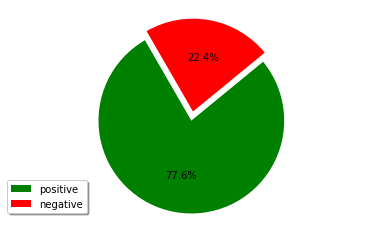

In [ ]:
explode=(0,0.1)
labels = 'positive', 'negative'
sizes=(pos,neg)
colors=('green','red')

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis Vader.png")

In [ ]:
df.to_csv('/content/drive/MyDrive/mini-bootcamp/hasil.csv', index=None)

## Accuracy 

### accuracy textblob

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(df['Label'],df['sentimen_textblob'])

0.554

In [ ]:
print(classification_report(df['Label'],df['sentimen_textblob']))

              precision    recall  f1-score   support

    negative       0.50      0.19      0.28       223
    positive       0.57      0.84      0.68       277

    accuracy                           0.55       500
   macro avg       0.53      0.52      0.48       500
weighted avg       0.54      0.55      0.50       500



In [ ]:
#Confusion Matrix Testing
cm_pred = confusion_matrix(df['Label'],df['sentimen_textblob'])
print(cm_pred)

[[ 43 180]
 [ 43 234]]


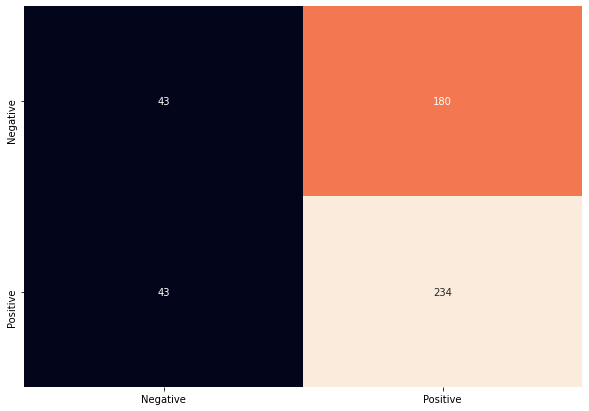

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative", "Positive"]],
                          columns = [i for i in ["Negative", "Positive"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")
plt.savefig('/content/drive/MyDrive/mini-bootcamp/confusion_matrix_textblob.jpg')

### accuracy vader

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(df['Label'],df['sentimen_vader'])

0.582

In [ ]:
print(classification_report(df['Label'],df['sentimen_vader']))

              precision    recall  f1-score   support

    negative       0.56      0.28      0.38       223
    positive       0.59      0.82      0.69       277

    accuracy                           0.58       500
   macro avg       0.58      0.55      0.53       500
weighted avg       0.58      0.58      0.55       500



In [ ]:
#Confusion Matrix Testing
cm_pred = confusion_matrix(df['Label'],df['sentimen_vader'])
print(cm_pred)

[[ 63 160]
 [ 49 228]]


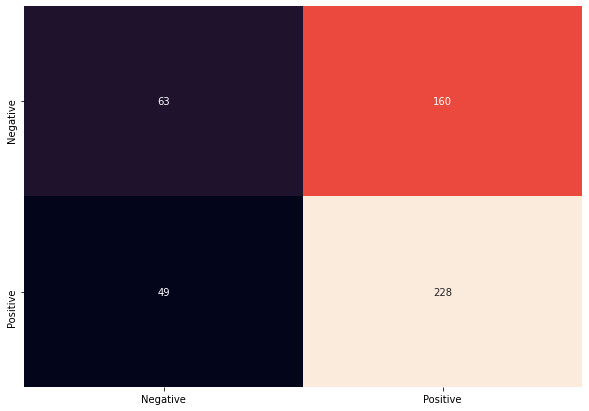

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm_pred = pd.DataFrame(cm_pred, index = [i for i in ["Negative", "Positive"]],
                          columns = [i for i in ["Negative",  "Positive"]])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_pred, annot=True, cbar=False, fmt="d")
plt.savefig('/content/drive/MyDrive/mini-bootcamp/confusion_matrix_vader.jpg')